## Stock Price Predictor

In [3]:
import numpy as np
import pandas as pd

import yfinance as yf

import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [4]:
stock = input('Enter the code of the Stock: ')
data = yf.download(stock, "2008-01-01", "2021-11-27", auto_adjust=True)
data.head()

[*********************100%***********************]  1 of 1 completed

1 Failed download:
['1']: HTTPError('HTTP Error 404: ')


Price,Adj Close,Close,High,Low,Open,Volume
Ticker,1,1,1,1,1,1
Date,,,,,,


In [5]:
data.shape

(0, 6)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 0 entries
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   (Adj Close, 1)  0 non-null      float64
 1   (Close, 1)      0 non-null      float64
 2   (High, 1)       0 non-null      float64
 3   (Low, 1)        0 non-null      float64
 4   (Open, 1)       0 non-null      float64
 5   (Volume, 1)     0 non-null      float64
dtypes: float64(6)
memory usage: 0.0 bytes


In [7]:
data.describe()

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,1,1,1,1,1,1
count,0.0,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN


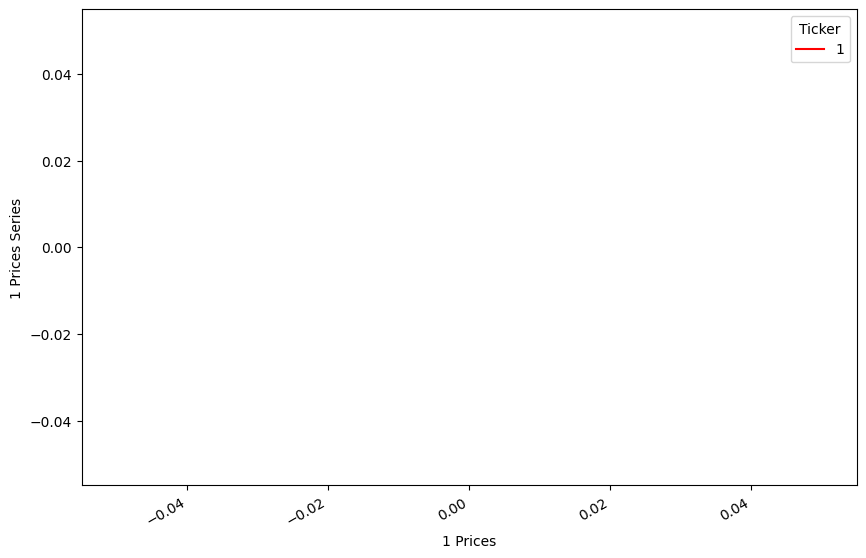

In [8]:
data.Close.plot(figsize=(10,7), color='r')
plt.xlabel(f"{stock} Prices")
plt.ylabel(f"{stock} Prices Series")
plt.show()

<Axes: >

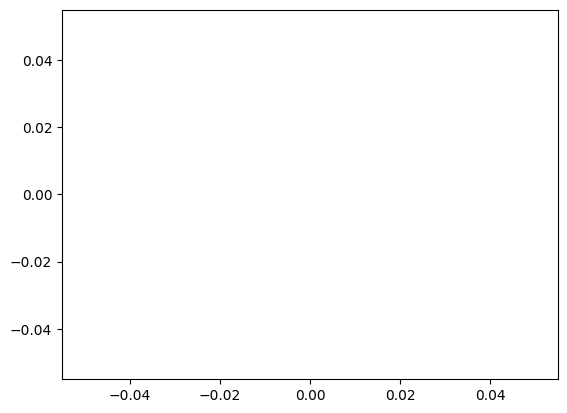

In [9]:
sns.distplot(data.Open)

<Axes: >

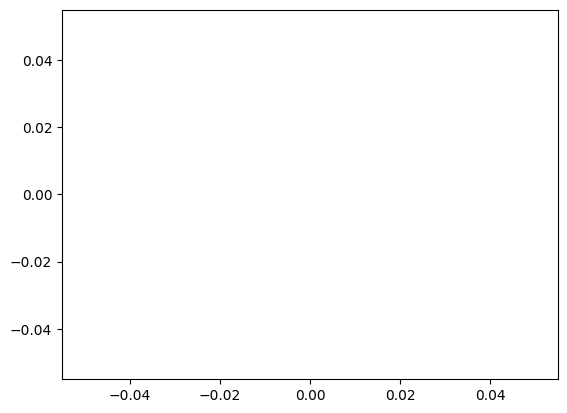

In [10]:
sns.distplot(data.High)

<Axes: >

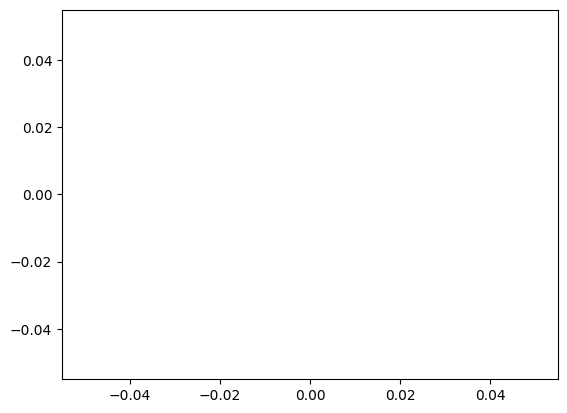

In [11]:
sns.distplot(data.Low)

<Axes: >

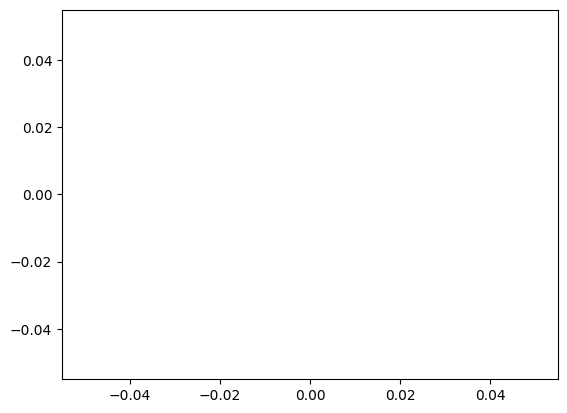

In [12]:
sns.distplot(data.Close)

### Conlusions
- Shape the of the data
- How our data is distributed
- It's is very very non-linear 

In [13]:
X = data.drop('Close', axis = 1)
y = data['Close']

## Training and Testing Dataset

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)

ValueError: With n_samples=0, test_size=0.2 and train_size=None, the resulting train set will be empty. Adjust any of the aforementioned parameters.

In [ ]:
print(X_train.shape, X_test.shape,y_train.shape,y_test.shape)

## Modeling Part

In [ ]:
from sklearn.linear_model import LinearRegression

model_lr = LinearRegression()
model_lr.fit(X_train, y_train)
pred = model_lr.predict(X_test)

In [ ]:
# Predict value print
pred

In [ ]:
# MSE (Mean Square Error)
# RMSE (Root Mean Square Error)
# r2_square --> 1.0 -> Very Good Model

from sklearn.metrics import mean_squared_error, r2_score

def calculate_metrics(y_test, y_pred):
    '''
        y_test: ground truth
        y_pred: model predict value
    '''
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2_scores = r2_score(y_test, y_pred)
    print('*'*50)
    print(f"*  Mean Square Error: {mse}")
    print(f"*  Root Mean Square Error: {rmse}")
    print(f"*  r2_score: {r2_scores}")
    print('*'*50)

calculate_metrics(y_test, pred)

### Lasso and Ridge Model

In [ ]:
from sklearn.linear_model import Lasso, Ridge

model_lasso = Lasso().fit(X_train, y_train)
model_ridge = Ridge().fit(X_train, y_train)

model_lasso_pred = model_lasso.predict(X_test)
model_ridge_pred = model_ridge.predict(X_test)

In [ ]:
calculate_metrics(y_test, model_lasso_pred)

calculate_metrics(y_test, model_ridge_pred)

## Support Vector Machine Regression

In [ ]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

params = {
    'C': [0.1, 1, 10, 100, 1000],
    'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
    'kernel': ['rbf']
}

params_grid = GridSearchCV(SVR(), params, refit=True, verbose=3)
params_grid.fit(X_train, y_train)

In [ ]:
model_svr = SVR(C=10, gamma=0.1, kernel='rbf')
model_svr.fit(X_train, y_train)
svr_pred = model_svr.predict(X_test)

## Model Save

In [ ]:
import joblib  

joblib.dump(model_ridge, 'model.pkl') 

ridge_from_joblib = model = joblib.load("model.pkl")